# ASSIGNMENT 4 
**Topic: Chapter 7, Chapter 8 & Chapter 9**
- Due: 21st January 2024
- Mode: Group Assignment (Not more than 3 students per group)
- Submission: E-Learning

### Question 1

(a)	Load `Sales Data.csv`, assign it into variable named `sales`. Display the first 10 rows of the `sales`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("Sales Data.csv")

sales.head(10)

month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   
5             6       2760      1555        4890         7490     1890   
6             7       2980      1120        4780         8980     1780   
7             8       3700      1400        5860         9960     2860   
8             9       3540      1780        6100         8100     2100   
9            10       1990      1890        8300        10300     2300   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600  
5         1555        20140        201400  
6         1120        20760        295500  
7         1400        25180        361400  
8         1780        23400        234000  
9         1890        26670        266700

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 996.0 bytes


(b)	Get total profit of all months and show line plot with the following style properties:

        ●	Line Style dotted 
        ●	Line color should be red
        ●	Line width should be 3
        ●	Add a circle marker with size 8 and blue color
        ●	Show legend at the lower right location.
        ●	X label name = Month Number
        ●	Y label name = Sold Unit number
        ●	Title = Company Sales Per Month

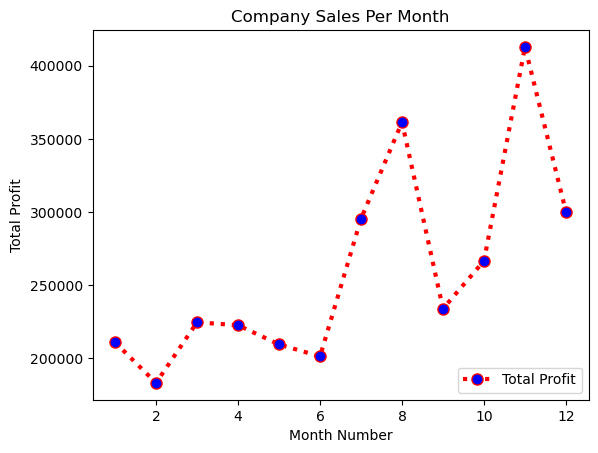

In [12]:
plt.plot(sales['month_number'], sales['total_profit'], linestyle='dotted', color='red', linewidth=3, marker='o', 
         markersize=8, markerfacecolor='blue', label='Total Profit')

plt.legend(loc='lower right')
plt.xlabel('Month Number')
plt.ylabel('Total Profit')
plt.title('Company Sales Per Month')
plt.show()

(c)	Read data from `Sales Data.csv` and show all product sales using a multiline plot, sized 1200 × 600 pixels. Differentiate all the lines by line color and marker.

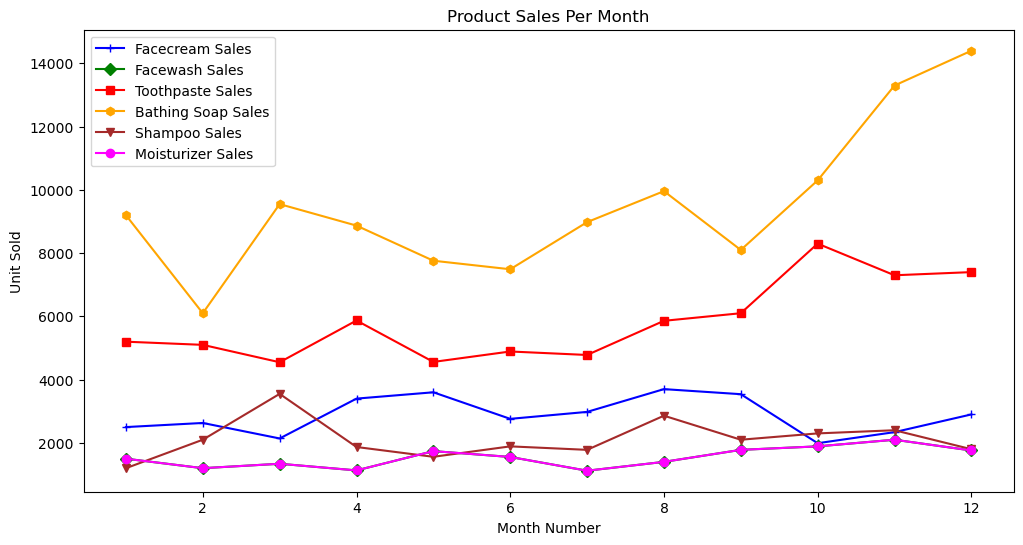

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
x = sales['month_number']

ax.plot(x, sales['facecream'], color='blue', marker='+', label="Facecream Sales")
ax.plot(x, sales['facewash'], color='green', marker='D', label="Facewash Sales")
ax.plot(x, sales['toothpaste'], color='red', marker='s', label="Toothpaste Sales")
ax.plot(x, sales['bathingsoap'], color='orange', marker='h', label="Bathing Soap Sales")
ax.plot(x, sales['shampoo'], color='brown', marker='v', label="Shampoo Sales")
ax.plot(x, sales['moisturizer'], color='magenta', marker='o', label="Moisturizer Sales")
ax.set_title("Product Sales Per Month")
ax.set_xlabel("Month Number")
ax.set_ylabel("Unit Sold");
ax.legend(loc='upper left');

(d)	The products in the sales data can be further grouped as follow:

    a.Category A: facecream, facewash, moisturizer
    b.Category B: toothpaste
    c.Category C: bathingsoap, shampoo
    
    
Group the data accordingly and obtain the following information, then plot into two subplots: 

    1.total unit sold of each category for every month
    2.percentage of total unit sold of each category for every month over the grand total of unit sold of that category.


In [30]:
mapping = {'facecream': 'Category A', 'facewash': 'Category A', 'moisturizer': 'Category A', 
           'toothpaste': 'Category B', 
           'bathingsoap': 'Category C', 'shampoo' : 'Category C'}

category = sales.groupby(mapping, axis=1)
sales_category = category.sum()
sales_category['month_number'] = sales['month_number']
sales_category['Grand Total of Unit Sold'] = sales['total_units']
sales_category['A Percentage Unit Sold (%)'] = sales_category['Category A']/sales_category['Category A'].sum()*100
sales_category['B Percentage Unit Sold (%)'] = sales_category['Category B']/sales_category['Category B'].sum()*100
sales_category['C Percentage Unit Sold (%)'] = sales_category['Category C']/sales_category['Category C'].sum()*100
sales_category = sales_category.reindex(columns=['month_number','Category A','Category B','Category C','A Percentage Unit Sold (%)',
                                                 'B Percentage Unit Sold (%)','C Percentage Unit Sold (%)','Grand Total of Unit Sold'])
sales_category

month_number  Category A  Category B  Category C  \
0              1      5500.0      5200.0     10400.0   
1              2      5030.0      5100.0      8200.0   
2              3      4820.0      4550.0     13100.0   
3              4      5660.0      5870.0     10740.0   
4              5      7080.0      4560.0      9320.0   
5              6      5870.0      4890.0      9380.0   
6              7      5220.0      4780.0     10760.0   
7              8      6500.0      5860.0     12820.0   
8              9      7100.0      6100.0     10200.0   
9             10      5770.0      8300.0     12600.0   
10            11      6540.0      7300.0     15700.0   
11            12      6420.0      7400.0     16200.0   

    A Percentage Unit Sold (%)  B Percentage Unit Sold (%)  \
0                     7.691232                    7.438135   
1                     7.033981                    7.295094   
2                     6.740316                    6.508368   
3                     7.914977                    8.396510   
4                     9.900713                    6.522672   
5                     8.208642                    6.994707   
6                     7.299678                    6.837362   
7                     9.089638                    8.382206   
8                     9.928681                    8.725504   
9                     8.068802                   11.872407   
10                    9.145574                   10.441997   
11                    8.977765                   10.585038   

    C Percentage Unit Sold (%)  Grand Total of Unit Sold  
0                     7.459475                     21100  
1                     5.881509                     18330  
2                     9.396069                     22470  
3                     7.703342                     22270  
4                     6.684837                     20960  
5                     6.727873                     20140  
6                     7.717688                     20760  
7                     9.195237                     25180  
8                     7.316024                     23400  
9                     9.037441                     26670  
10                   11.260938                     29540  
11                   11.619567                     30020

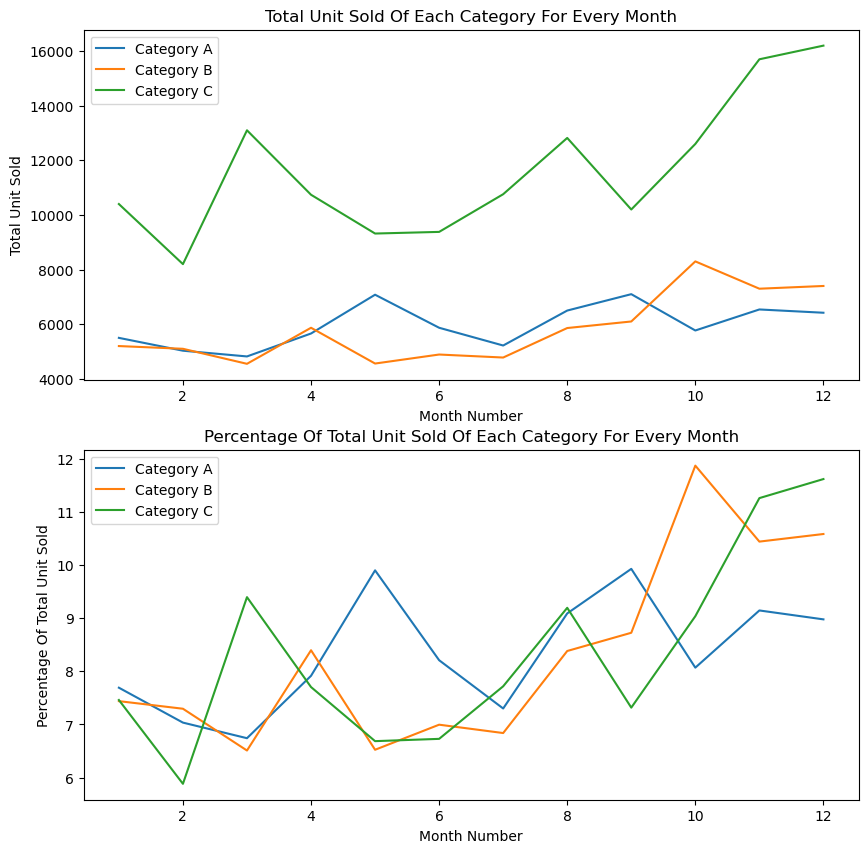

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
x = sales_category['month_number']

axes[0].plot(x, sales_category['Category A'], label="Category A")
axes[0].plot(x, sales_category['Category B'], label="Category B")
axes[0].plot(x, sales_category['Category C'], label="Category C")
axes[0].set_title("Total Unit Sold Of Each Category For Every Month")
axes[0].set_xlabel("Month Number")
axes[0].set_ylabel("Total Unit Sold");
axes[0].legend(loc=0);

axes[1].plot(x, sales_category['A Percentage Unit Sold (%)'], label="Category A")
axes[1].plot(x, sales_category['B Percentage Unit Sold (%)'], label="Category B")
axes[1].plot(x, sales_category['C Percentage Unit Sold (%)'], label="Category C")
axes[1].set_title("Percentage Of Total Unit Sold Of Each Category For Every Month")
axes[1].set_xlabel("Month Number")
axes[1].set_ylabel("Percentage Of Total Unit Sold");
axes[1].legend(loc=0);


### Question 2

(a) Read the three datasets given below and save the data into different DataFrame.

    a.customer.csv
    b.products.csv
    c.sales.csv


In [35]:
customer = pd.read_csv("customer.csv")
products = pd.read_csv("products.csv")
sales1 = pd.read_csv("sales.csv")

customer

c_id Customer
0     1     Rabi
1     2     Raju
2     3     Alex
3     4     Rani
4     5     King
5     7     Ronn
6     8      Jem
7     9      Tom

In [36]:
products

p_id       product  price
0     1     Hard Disk     80
1     2           RAM     90
2     3       Monitor     75
3     4           CPU     55
4     5      Keyboard     20
5     6         Mouse     10
6     7   Motherboard     50
7     8  Power supply     20

In [38]:
sales1

sale_id  c_id  p_id  product  qty store
0        1     2     3  Monitor    2   ABC
1        2     2     4      CPU    1   DEF
2        3     1     3  Monitor    3   ABC
3        4     4     2      RAM    2   DEF
4        5     2     3  Monitor    3   ABC
5        6     3     3  Monitor    2   DEF
6        7     2     2      RAM    3   ABC
7        8     3     2      RAM    2   DEF
8        9     2     3  Monitor    2   ABC

(b) From the above datasets, produce a chart (any appropriate chart) for each below:

    a.products sold by each store
    b.quantity sold against each product
    c.quantity and total sales against each product


<Axes: title={'center': 'Products Sold By Each Store'}, xlabel='Store', ylabel='Quantity'>

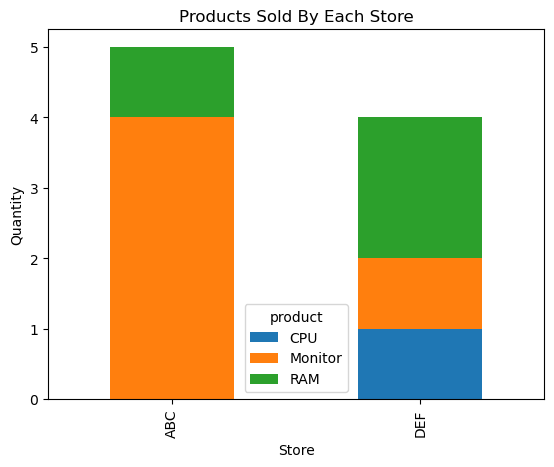

In [45]:
# Question a
pd.crosstab(sales1["store"], sales1["product"]).plot.bar(stacked=True, 
                                                         title="Products Sold By Each Store", 
                                                         xlabel='Store', ylabel="Quantity")

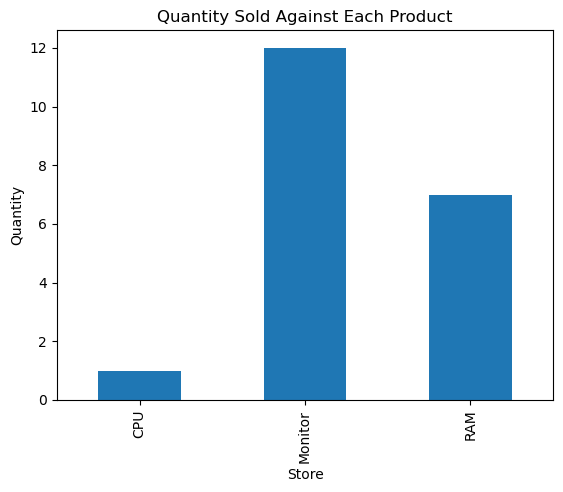

In [48]:
# Question b
df = sales1.groupby('product')['qty'].sum()
df.plot.bar(title="Quantity Sold Against Each Product", xlabel='Store', ylabel='Quantity');

In [50]:
# Question c
df2 = sales1.groupby(['product', 'p_id', 'store'])['qty'].sum()
df2

product  p_id  store
CPU      4     DEF       1
Monitor  3     ABC      10
               DEF       2
RAM      2     ABC       3
               DEF       4
Name: qty, dtype: int64

In [54]:
qty_sales = pd.merge(df2, products, how = 'left', on = 'p_id')
qty_sales['Total Sales'] = qty_sales['qty'] * qty_sales['price']
qty_sales = qty_sales.groupby('product').sum()

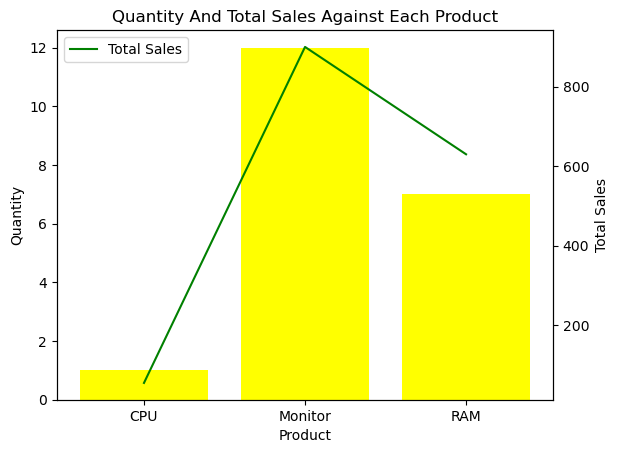

In [59]:
fig, ex1 = plt.subplots()
x = qty_sales.index
y = qty_sales['qty']
z = qty_sales['Total Sales']

ex1.bar(x,y, color='yellow', linestyle='-.')
ex1.set_title("Quantity And Total Sales Against Each Product")
ex1.set_xlabel('Product')
ex1.set_ylabel('Quantity')

ex2 = ex1.twinx()
ex2.plot(x,z, color='green', linestyle='-', label="Total Sales")
ex2.set_ylabel('Total Sales')
ex2.legend(loc='upper left');

(c) From the above datasets, produce an output for each below:

    a.quantity sold against each product against each store
    b.quantity sold against each store with total turnover of the store
    c.products which are not sold
    d.customers who have not purchased any product


In [60]:
# Question a
sales1.groupby(['store','product'])['qty'].sum()

store  product
ABC    Monitor    10
       RAM         3
DEF    CPU         1
       Monitor     2
       RAM         4
Name: qty, dtype: int64

### Question 3

Given two dataset (`Death Male.xlsx` and `Death Female.xlsx`) that contains the data of recorded death in five states in Malaysia from 2011 to 2018.

**Task A**

(i)	Read the `Death Male.xlsx` and store it in a DataFrame named `death_male`. Group the data by `Year` and name the result as `dm_by_year` and plot a pie chart.


In [4]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


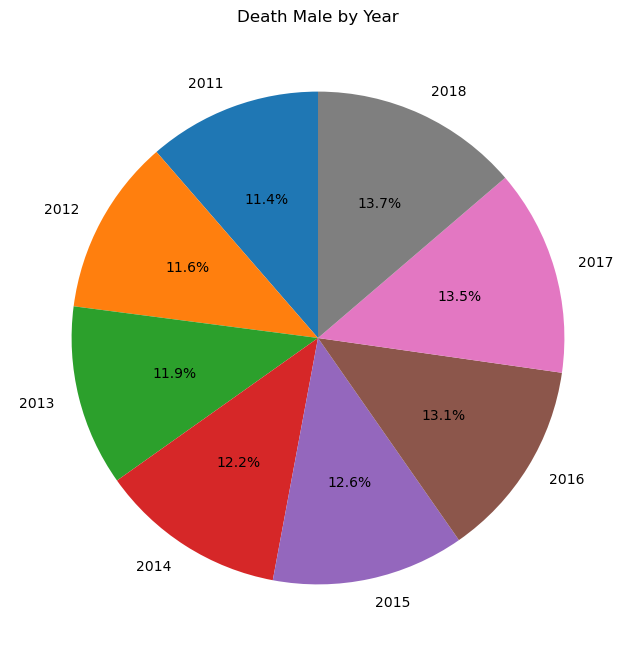

In [2]:
# (i) Read Death Male.xlsx and group data by Year
death_male = pd.read_excel('Death Male.xlsx')
dm_by_year = death_male.groupby('Year')['Number of death'].sum()

plt.figure(figsize=(8, 8))
plt.pie(dm_by_year, labels=dm_by_year.index, autopct='%1.1f%%', startangle=90)
plt.title('Death Male by Year')
plt.show()

(ii) Read the `Death Female.xlsx` and store it in a DataFrame named `death_female`. Group the data by `State` and name the result as `df_by_state` and plot an appropriate chart.

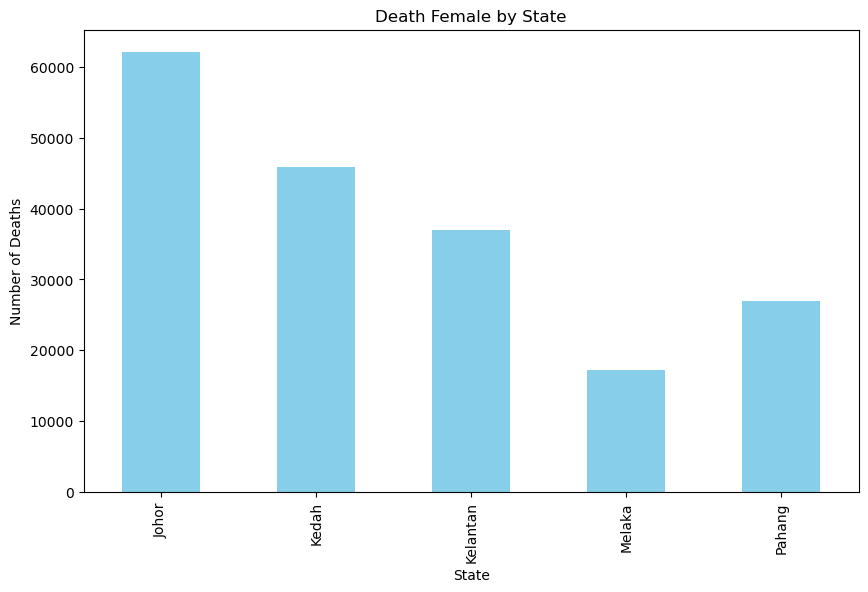

In [3]:
# (ii) Read Death Female.xlsx and group data by State
death_female = pd.read_excel('Death Female.xlsx')
df_by_state = death_female.groupby('State')['Number of death'].sum()

plt.figure(figsize=(10, 6))
df_by_state.plot(kind='bar', color='skyblue')
plt.title('Death Female by State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.show()

**Task 2**

(i)	  Concatenate both `death_male` and `death_female` DataFrame and name the new DataFrame as `death`.	<br>
(ii)  Group the `death` by `State` and name the result as `by_state`.	<br>
(iii) Group the `death` by `Year` name the result as `by_year`.	<br>
(iv)  Create a chart as shown below with figure size of 12 inches × 6 inches and save it as Death in 2011-2018.png with dpi value 200.


<br>
<img src="Fig1.png", style="width: 750px";>

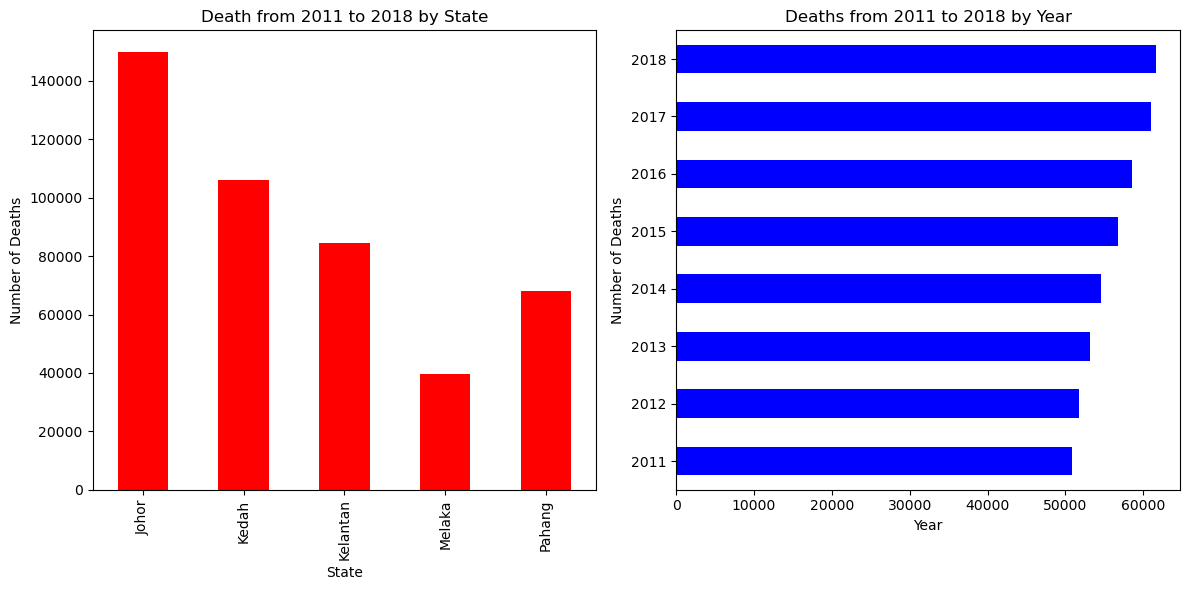

In [4]:
# (i) Concatenate death_male and death_female DataFrames
death = pd.concat([death_male, death_female], ignore_index=True)

# (ii) Group death by State
by_state = death.groupby('State')['Number of death'].sum()

# (iii) Group death by Year
by_year = death.groupby('Year')['Number of death'].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar graph for death by State
by_state.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Death from 2011 to 2018 by State')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Deaths')

# Bar graph for death by Year
by_year.plot(kind='barh', ax=axes[1], color='blue')
axes[1].set_title('Deaths from 2011 to 2018 by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Deaths')

plt.tight_layout()
plt.savefig('Death in 2011-2018.png', dpi=200)
plt.show()


**Task 3**

(i)	Create a pivot table with the name `death_pivot` as shown below.

<br>
<img src="Fig2a.png", style="width: 300px";>

In [5]:
death_pivot = death.pivot_table(values='Number of death',
                                index=['Gender', 'Year'],
                                columns='State',
                                aggfunc='sum')

death_pivot

State        Johor  Kedah  Kelantan  Melaka  Pahang
Gender Year                                        
Female 2011   6875   5025      4400    1964    3080
       2012   7212   5209      4301    1987    3078
       2013   7335   5420      4407    2078    3184
       2014   7387   5613      4630    2009    3209
       2015   7808   5941      4702    2181    3427
       2016   8250   6037      4698    2271    3531
       2017   8586   6283      4919    2431    3763
       2018   8733   6336      4984    2328    3721
Male   2011   9604   6844      5624    2642    4732
       2012   9989   7059      5589    2588    4713
       2013  10361   7096      5635    2669    4962
       2014  10517   7404      5958    2719    5092
       2015  11045   7733      6087    2778    5044
       2016  11674   7734      6111    2915    5347
       2017  12076   8049      6284    3092    5498
       2018  12384   8216      6332    3079    5525

(ii) Create a plot as shown below.

<br>
<img src="Fig3.png", style="width: 800px";>

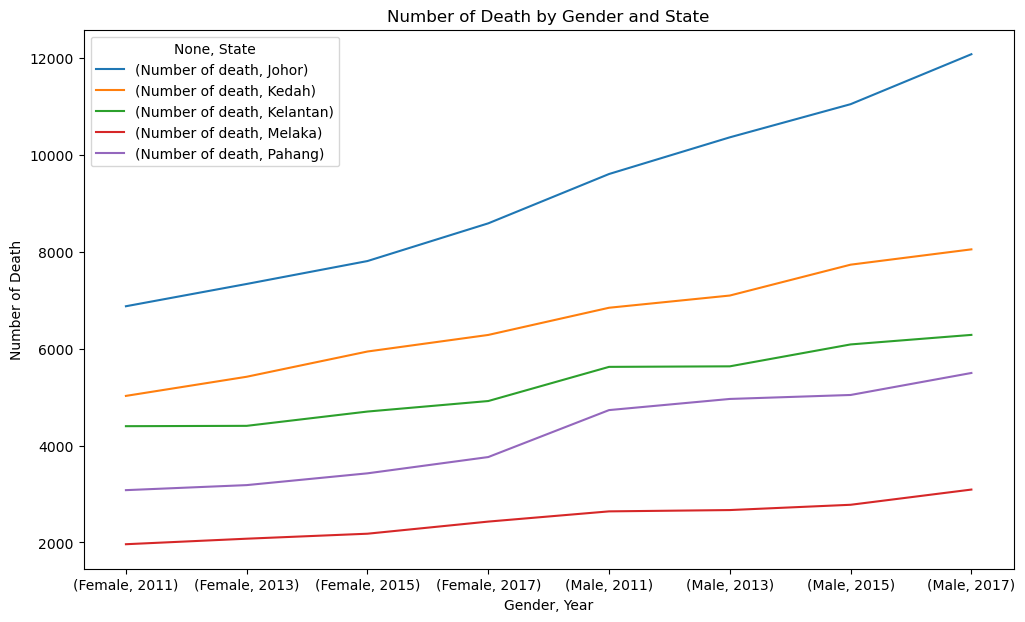

In [6]:
state = death_pivot.columns

death_pivot.plot(kind = 'line', figsize = (12,6))

plt.title('Number of Death by Gender and State ')
plt.xlabel('Gender, Year')
plt.ylabel('Number of Death')

plt.legend(title='None,State',labels=labels, loc='upper left')

    
plt.show()

### Question 4

(a)	The file named `Expenditure.xlsx` describes the expenditure (in dollars) on recreation per month by employees at a certain company, and their corresponding monthly incomes. 

    (i)	Using simple linear regression method, find the equation of the regression line. 
    (ii)	Find the slope and interception values for the regression line. 
    (iii)   Plot the data with the regression line.
    (iv)	Then estimate the monthly income of an employee at this company who spends 5000 dollars per month on recreation.  	


In [10]:
expenditure = pd.read_excel("Expenditure.xlsx")
expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Expenditure  10 non-null     int64
 1   Income       10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Question i

y = expenditure['Expenditure']
x = expenditure[['Income']]

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"The equation of the regression line is: y = {slope} * x + {intercept}")

The equation of the regression line is: y = 0.07226304572129587 * x + -494.97550228971977


In [14]:
# Question ii

print(f"The slope of the regression line is: {slope}")
print(f"The intercept of the regression line is: {intercept}")

The slope of the regression line is: 0.07226304572129587
The intercept of the regression line is: -494.97550228971977


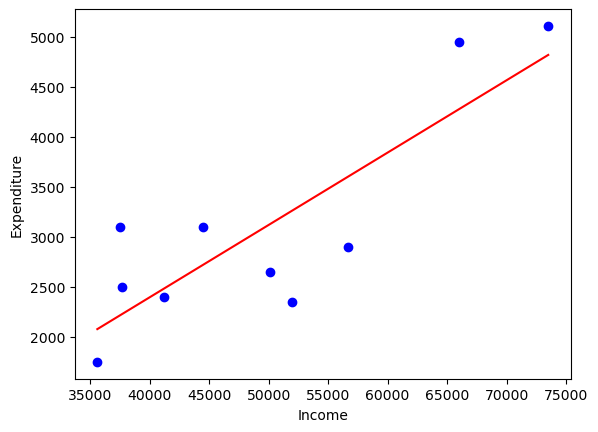

In [19]:
# Question iii

income_range = np.linspace(min(x['Income']), max(x['Income']), num=100).reshape(-1, 1)
expenditure_values = model.predict(income_range)
plt.scatter(x, y, color='blue')
plt.plot(income_range, expenditure_values, color='red')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.show()

In [20]:
# Question iv

estimated_income = model.predict([[5000]])
print(f"The estimated monthly income of an employee who spends $5000 per month on recreation is: {estimated_income[0]}")

The estimated monthly income of an employee who spends $5000 per month on recreation is: -133.6602736832404


(b) Clustering Task:

(i)	Load the `Titanic.csv` into a DataFrame named `Titanic`. Below is the data dictionary for the dataset.

<br>
<img src="Fig4.png", style="width: 500px";>

(ii) Perform dimensionality reduction to the dataset using the Principal Component Analysis (PCA) and next apply k-means clustering to the data.

In [21]:
# Question i

Titanic = pd.read_csv("Titanic.csv")
Titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         1       1    0  80.0      0      0  30.0000      1         0
1         0       1    0  31.0      0      0  50.4958      1         0
2         1       1    0   4.0      0      2  81.8583      1         0
3         0       1    0  39.0      0      0   0.0000      1         0
4         1       1    0  28.0      0      0  35.5000      1         0

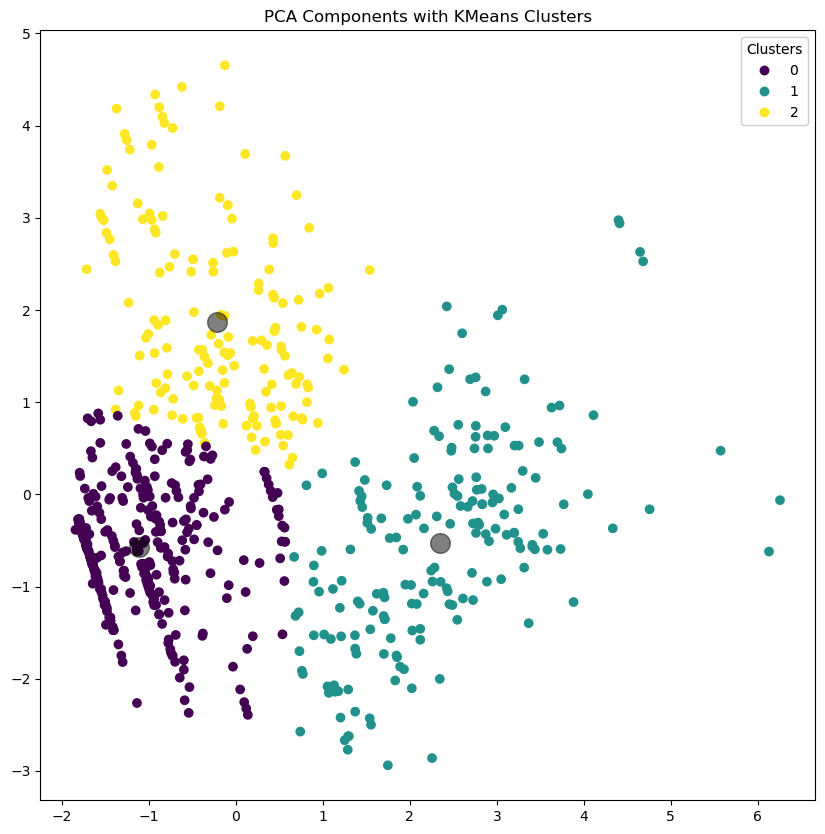

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it's already preprocessed
df = Titanic

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA to reduce the dimensions of your data
pca = PCA(n_components=2)  # You can choose the number of components
df_pca = pca.fit_transform(df_scaled)

# Apply k-means clustering on the transformed data
kmeans = KMeans(n_clusters=3)  # Choose an appropriate value for k
kmeans.fit(df_pca)

# Get the cluster assignments
clusters = kmeans.predict(df_pca)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')

# Compute cluster centers and draw them
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_title('PCA Components with KMeans Clusters')
plt.show()